In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week7/')

In [34]:
# load alphafold results and crystal structure as trajectory files using mdtraj
alphafold_ranked_results = []
alphafold_ranked_results.append(md.load_pdb('Data/alphafold_rcsb_pdb_3RY2/unrelaxed_model_1_pred_0.pdb'))
alphafold_ranked_results.append(md.load_pdb('Data/alphafold_rcsb_pdb_3RY2/unrelaxed_model_2_pred_0.pdb'))
alphafold_ranked_results.append(md.load_pdb('Data/alphafold_rcsb_pdb_3RY2/unrelaxed_model_3_pred_0.pdb'))
alphafold_ranked_results.append(md.load_pdb('Data/alphafold_rcsb_pdb_3RY2/unrelaxed_model_4_pred_0.pdb'))
alphafold_ranked_results.append(md.load_pdb('Data/alphafold_rcsb_pdb_3RY2/unrelaxed_model_5_pred_0.pdb'))

colabfold_ranked_results = []
colabfold_ranked_results.append(md.load_pdb('Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_1_model_3.pdb'))
colabfold_ranked_results.append(md.load_pdb('Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_2_model_5.pdb'))
colabfold_ranked_results.append(md.load_pdb('Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_3_model_4.pdb'))
colabfold_ranked_results.append(md.load_pdb('Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_4_model_1.pdb'))
colabfold_ranked_results.append(md.load_pdb('Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_5_model_2.pdb'))

crystal_structure = md.load_pdb('Inputs/3ry2.pdb')

## RMSD analysis

In [27]:
# rmsd can align the alphafold predictions to the crystal structure
print(crystal_structure.top)
# the crystal structure has 6 chains. Use the first chain as the reference
ref_structure = crystal_structure.atom_slice(crystal_structure.top.select('chainid 0'))

# define different selections 
# selection based on the alpha carbon atoms
alpha_carbon_selection = 'name CA'
# selection based on the full backbone
backbone_selection = 'backbone'
# selection based on the sidechain
sidechain_selection = 'sidechain'

<mdtraj.Topology with 6 chains, 527 residues, 2143 atoms, 1908 bonds>


In [35]:
alphafold_rmsd = {'alpha_carbon': [], 'backbone': [], 'sidechain': []}
colabfold_rmsd = {'alpha_carbon': [], 'backbone': [], 'sidechain': []}

# calculate the rmsd for each prediction
for i in range(5):
    alphafold_rmsd['alpha_carbon'].append(md.rmsd(alphafold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(alpha_carbon_selection)))
    alphafold_rmsd['backbone'].append(md.rmsd(alphafold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(backbone_selection)))
    alphafold_rmsd['sidechain'].append(md.rmsd(alphafold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(sidechain_selection)))
    colabfold_rmsd['alpha_carbon'].append(md.rmsd(colabfold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(alpha_carbon_selection)))
    colabfold_rmsd['backbone'].append(md.rmsd(colabfold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(backbone_selection)))
    colabfold_rmsd['sidechain'].append(md.rmsd(colabfold_ranked_results[i], ref_structure, atom_indices=ref_structure.top.select(sidechain_selection)))


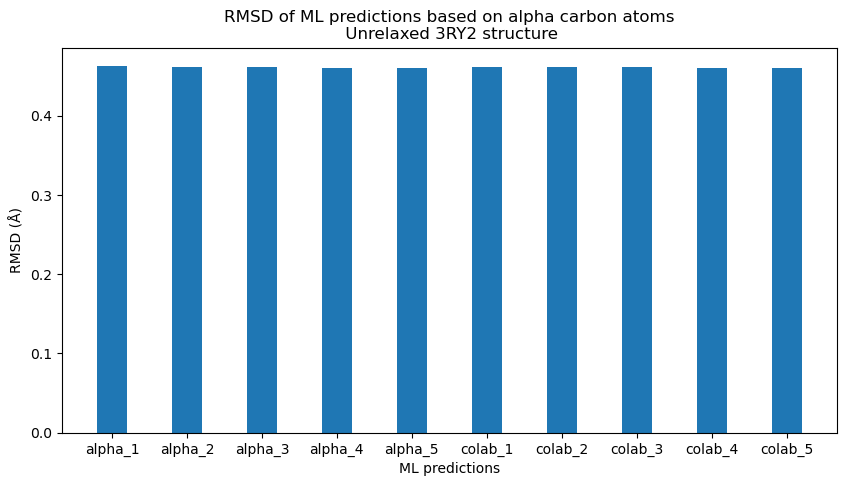

In [51]:
# make a bar plot for the rmsd of each predicted strucutre based on alpha carbon atoms
plt.figure(figsize=(10, 5))
x_labels = ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5', 'colab_1', 'colab_2', 'colab_3', 'colab_4', 'colab_5']
y_values = np.array(alphafold_rmsd['alpha_carbon'] + colabfold_rmsd['alpha_carbon']).flatten()
plt.bar(x_labels, y_values, width=0.4)
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.title('RMSD of ML predictions based on alpha carbon atoms\n Unrelaxed 3RY2 structure')
plt.savefig('Figures/rmsd_alpha_carbon.pdf', bbox_inches='tight')
plt.show()

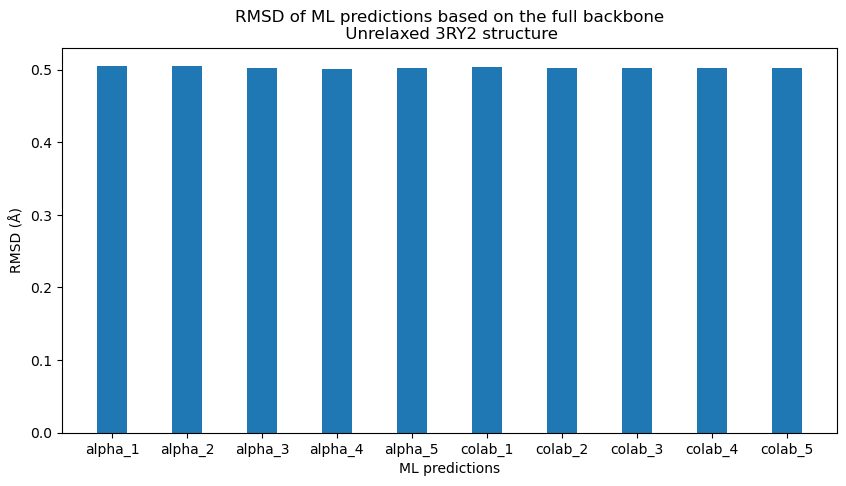

In [52]:
# make a bar plot for the rmsd of each predicted strucutre based on the full backbone
plt.figure(figsize=(10, 5))
x_labels = ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5', 'colab_1', 'colab_2', 'colab_3', 'colab_4', 'colab_5']
y_values = np.array(alphafold_rmsd['backbone'] + colabfold_rmsd['backbone']).flatten()
plt.bar(x_labels, y_values, width=0.4)
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.title('RMSD of ML predictions based on the full backbone\n Unrelaxed 3RY2 structure')
plt.savefig('Figures/rmsd_backbone.pdf', bbox_inches='tight')
plt.show()

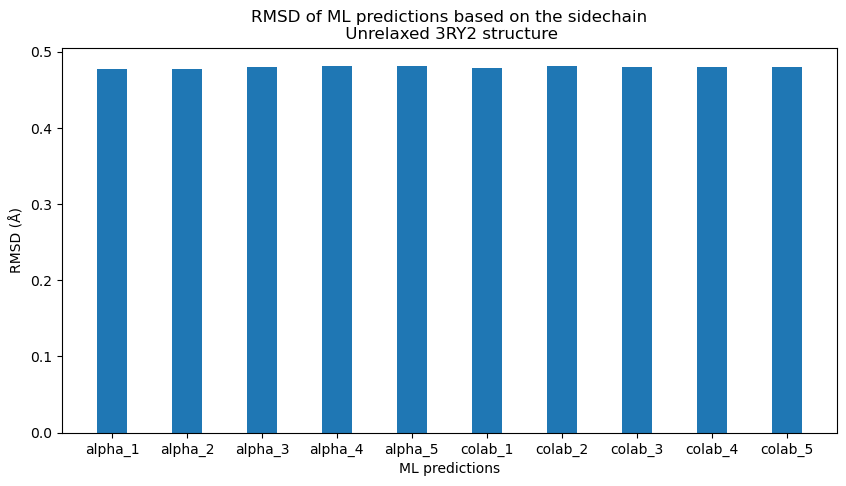

In [53]:
# make a bar plot for the rmsd of each predicted strucutre based on the sidechain
plt.figure(figsize=(10, 5))
x_labels = ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5', 'colab_1', 'colab_2', 'colab_3', 'colab_4', 'colab_5']
y_values = np.array(alphafold_rmsd['sidechain'] + colabfold_rmsd['sidechain']).flatten()
plt.bar(x_labels, y_values, width=0.4)
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.title('RMSD of ML predictions based on the sidechain\n Unrelaxed 3RY2 structure')
plt.savefig('Figures/rmsd_sidechain.pdf', bbox_inches='tight')
plt.show()

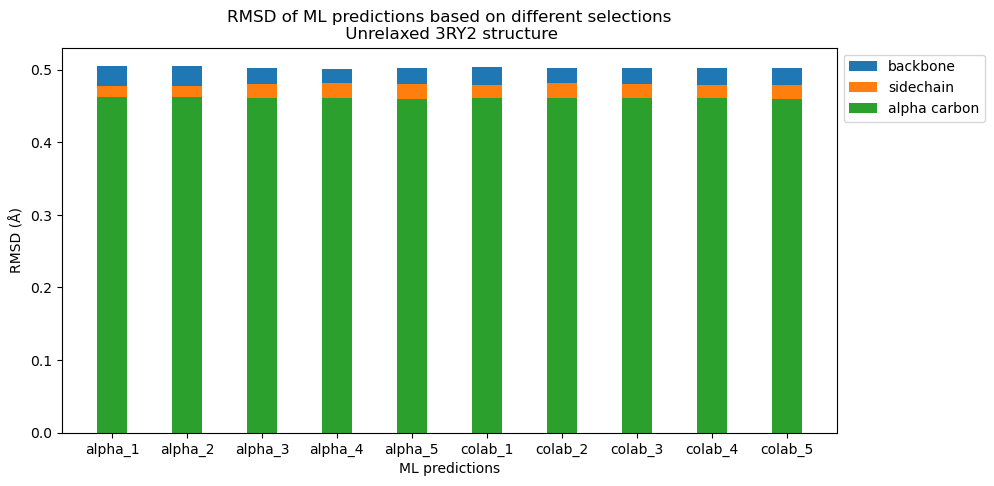

In [56]:
# plot these three bar plots together
plt.figure(figsize=(10, 5))
x_labels = ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5', 'colab_1', 'colab_2', 'colab_3', 'colab_4', 'colab_5']
y_values = np.array(alphafold_rmsd['backbone'] + colabfold_rmsd['backbone']).flatten()
plt.bar(x_labels, y_values, width=0.4, label='backbone')
y_values = np.array(alphafold_rmsd['sidechain'] + colabfold_rmsd['sidechain']).flatten()
plt.bar(x_labels, y_values, width=0.4, label='sidechain')
y_values = np.array(alphafold_rmsd['alpha_carbon'] + colabfold_rmsd['alpha_carbon']).flatten()
plt.bar(x_labels, y_values, width=0.4, label='alpha carbon')
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.title('RMSD of ML predictions based on different selections\n Unrelaxed 3RY2 structure')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('Figures/rmsd_all.pdf', bbox_inches='tight')
plt.show()

## PLDDT score colored structure

File: alphafold_plddt_score_colored_rank1_structure.pdf

In the PLDDT score colored structure, the blue part has the high-confidence prediction. In this structure we can see that most parts of 3RY2 are predicted with confidence. Only the rear region is unpredictable, which means this substructure can be flexible. 

## PLDDT vs. RMSD

In [70]:
import pickle
import json
# load the pkl files and calculate the average PLDDT score
avg_plddt_alphafold = []
avg_plddt_colabfold = []
colab_rank_id = {1: 3, 2: 5, 3: 4, 4: 1, 5: 2}
for i in range(5):
    alphafold_plddt = pickle.load(open(f'Data/alphafold_rcsb_pdb_3RY2/result_model_{i+1}_pred_0.pkl', 'rb'))['plddt']
    colabfold_plddt = json.load(open(f'Data/colabfold_3ry2_with_amber_76ce1.result/3ry2_with_amber_76ce1_unrelaxed_rank_{i+1}_model_{colab_rank_id[i+1]}_scores.json', 'rb'))['plddt']
    avg_plddt_alphafold.append(np.mean(alphafold_plddt))
    avg_plddt_colabfold.append(np.mean(colabfold_plddt))

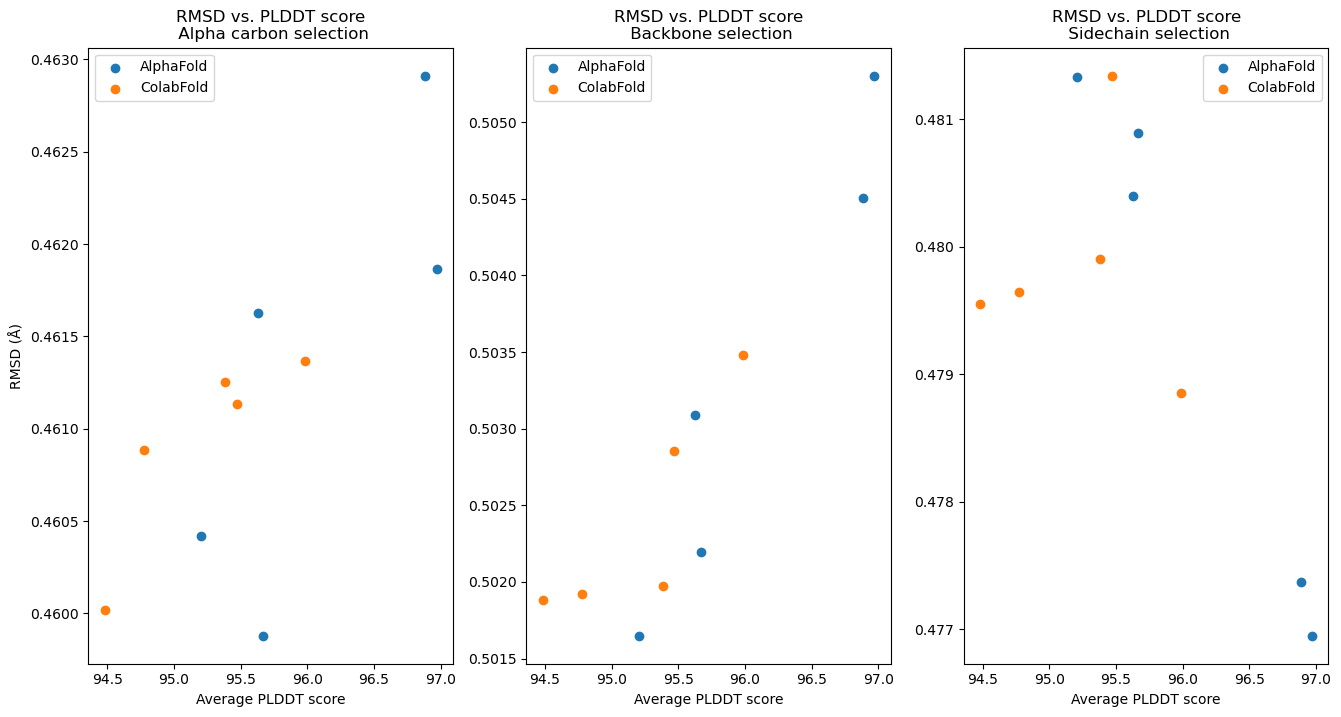

In [78]:
# plot scatter plot for the average PLDDT score vs. the RMSD, three figures for different selections
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].scatter(avg_plddt_alphafold, alphafold_rmsd['alpha_carbon'], label='AlphaFold')
ax[0].scatter(avg_plddt_colabfold, colabfold_rmsd['alpha_carbon'], label='ColabFold')
ax[0].set_xlabel('Average PLDDT score')
ax[0].set_ylabel('RMSD (Å)')
ax[0].set_title('RMSD vs. PLDDT score\n Alpha carbon selection')
ax[0].legend()
ax[1].scatter(avg_plddt_alphafold, alphafold_rmsd['backbone'], label='AlphaFold')
ax[1].scatter(avg_plddt_colabfold, colabfold_rmsd['backbone'], label='ColabFold')
ax[1].set_xlabel('Average PLDDT score')
ax[1].set_title('RMSD vs. PLDDT score\n Backbone selection')
ax[1].legend()
ax[2].scatter(avg_plddt_alphafold, alphafold_rmsd['sidechain'], label='AlphaFold')
ax[2].scatter(avg_plddt_colabfold, colabfold_rmsd['sidechain'], label='ColabFold')
ax[2].set_xlabel('Average PLDDT score')
ax[2].set_title('RMSD vs. PLDDT score\n Sidechain selection')
ax[2].legend()
plt.savefig('Figures/rmsd vs plddt score.pdf', bbox_inches='tight')
plt.show()